In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False)
bench.config.config["model"] = "model_v2.onnx"
bench.active_session
bench.set_session()

In [3]:
df = pd.read_csv(bench.config.get_path("test_dataset"))

In [4]:
def plot_true_lc(ccs, target):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    fidelity_params = bench.config.fidelity_params[0]
    # Subset data to obtain learning curve for config
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        config = pd.DataFrame(data = x, index = [0])
        config.drop(fidelity_params, axis = 1, inplace=True)
        pdf = df.merge(config, on=list(config.columns.values))
        pdf = pdf.sort_values(bench.config.fidelity_params[0])
        plt.plot(pdf[bench.config.fidelity_params[0]], pdf[target],
                 color = colors[i], marker = "o", linestyle="None", alpha=0.5)

In [5]:
def plot_lc(ccs, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
    for i, cc in enumerate(ccs):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

2023-09-02 10:18:54.281338048 [E:onnxruntime:, sequential_executor.cc:514 ExecuteKernel] Non-zero status code returned while running Reshape node. Name:'/Reshape_32' Status Message: /onnxruntime_src/onnxruntime/core/providers/cpu/tensor/reshape_helper.h:40 onnxruntime::ReshapeHelper::ReshapeHelper(const onnxruntime::TensorShape&, onnxruntime::TensorShapeVector&, bool) gsl::narrow_cast<int64_t>(input_shape.Size()) == size was false. The input tensor cannot be reshaped to the requested shape. Input shape:{0}, requested shape:{}



RuntimeException: [ONNXRuntimeError] : 6 : RUNTIME_EXCEPTION : Non-zero status code returned while running Reshape node. Name:'/Reshape_32' Status Message: /onnxruntime_src/onnxruntime/core/providers/cpu/tensor/reshape_helper.h:40 onnxruntime::ReshapeHelper::ReshapeHelper(const onnxruntime::TensorShape&, onnxruntime::TensorShapeVector&, bool) gsl::narrow_cast<int64_t>(input_shape.Size()) == size was false. The input tensor cannot be reshaped to the requested shape. Input shape:{0}, requested shape:{}


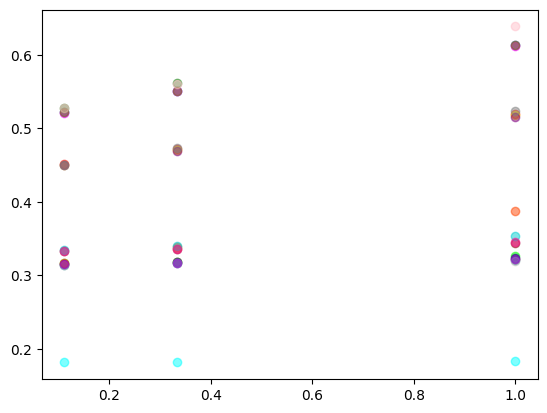

In [6]:
# Draw a sample configuration
ccs = [df.sample(1).to_dict() for i in range(20)]
target = "rammodel"
#target = "model_parameters"
fidelity_sequence = [0.05, 0.10, 0.2, 0.4, 0.6, 0.8, 1.00]
#fidelity_sequence = range(1, 51)
plot_true_lc(ccs, target=target)
plot_lc(ccs, target=target, fidelity_sequence=fidelity_sequence)

In [12]:
ccs

[{'task_id': {247: 14965},
  'pre_post': {247: 'pre'},
  'cp': {247: 0.0010553013},
  'maxdepth': {247: 19.0},
  'minbucket': {247: 26.0},
  'minsplit': {247: 51.0},
  'reweighing_os_alpha': {247: 0.72939},
  'EoD_alpha': {247: nan},
  'trainsize': {247: 0.11111111},
  'mmce': {247: 0.107739255},
  'f1': {247: 0.9401478},
  'feo': {247: 0.029625619},
  'facc': {247: 0.0275162},
  'ftpr': {247: 0.0042105606},
  'ffomr': {247: 0.06324618},
  'ffnr': {247: 0.0042105606},
  'rammodel': {247: 0.530806},
  'timetrain': {247: 1.426}},
 {'task_id': {1400: 31},
  'pre_post': {1400: 'post'},
  'cp': {1400: 0.0039182515},
  'maxdepth': {1400: 24.0},
  'minbucket': {1400: 97.0},
  'minsplit': {1400: 90.0},
  'reweighing_os_alpha': {1400: nan},
  'EoD_alpha': {1400: 0.44245976},
  'trainsize': {1400: 0.11111111},
  'mmce': {1400: 0.3},
  'f1': {1400: 0.8235294},
  'feo': {1400: 0.0},
  'facc': {1400: 0.10287062},
  'ftpr': {1400: 0.0},
  'ffomr': {1400: 1.0},
  'ffnr': {1400: 0.0},
  'rammodel': {1

In [17]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False, noisy=False)
bench.config.config["model"] = "model_v2.onnx"
print(bench.active_session)
bench.set_session()
print(bench._get_model_path())

target = "mmce"

False
/home/lps/Phd/yahpo_data/fair_rpart/model_v2.onnx


In [18]:
def plot_lc_noisy(cc, target, fidelity_sequence):
    colors = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
              "#00FFFF", "#FFA500", "#800080", "#008000", "#000080",
              "#800000", "#008080", "#808000", "#808080", "#C0C0C0",
              "#FFC0CB", "#FF4500", "#00CED1", "#FF1493", "#9400D3"]
   
    for i in range(len(colors)):
        x = {k:list(cc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
        x[bench.config.instance_names] = str(x[bench.config.instance_names])
        # FIXME: rbv2_ranger, rbv2_svm, rbv2_super, iaml_ranger, iaml_super
        # replace and shrinking must be converted to str
        if "replace" in x.keys():
            if x["replace"]:
                x["replace"] = "TRUE"
            else:
                x["replace"] = "FALSE"
        if "shrinking" in x.keys():
            if x["shrinking"]:
                x["shrinking"] = "TRUE"
            else:
                x["shrinking"] = "FALSE"
        if "repl" in x.keys():
            x["repl"] = str(x["repl"])
        x = {key: value for (key, value) in x.items() if not pd.isna(value)}
        out = []
        for fidelity in fidelity_sequence:
            val = x.copy()
            val.update({bench.config.fidelity_params[0]: fidelity})
            out += [val]

        res = bench.objective_function(out, seed=i)
        res = [x[target] for x in res]
        plt.plot(fidelity_sequence, res, color = colors[i])

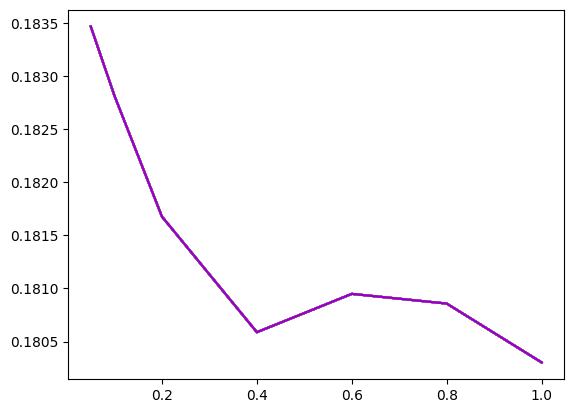

In [19]:
plot_lc_noisy(ccs[8], target, fidelity_sequence)

In [20]:
bench = BenchmarkSet("fair_rpart", active_session=False, check=False, noisy=True)
bench._get_model_path()

'/home/lps/Phd/yahpo_data/fair_rpart/model_v2_noisy.onnx'

In [ ]:
plot_lc_noisy(ccs[8], target, fidelity_sequence)